# South German Credit

## about the dataset: 
https://archive.ics.uci.edu/dataset/522/south+german+credit

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from math import sqrt

%matplotlib inline

In [2]:
# mudando o diretório 

import os

os.getcwd()

'/home/marcos_well/Área de Trabalho/Projetos_Python/data science/linear regression  and logistic'

In [3]:
os.chdir('/home/marcos_well/Área de Trabalho/Projetos_Python/om/dados')

In [4]:
df_original = pd.read_csv('SouthGermanCredit.asc', sep = ' ')

In [5]:
df_original.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [6]:
df = df_original

In [7]:
# Verificando os valores faltantes

print(df.isnull().values.any())
print(df.isna().values.any())

False
False


In [8]:
# renomeando as variaveis 

df.columns = ['status', 'duration', 'credit_history', 'purpose', 'amount',  'savings', 'employment_duration'
              , 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property'
              ,  'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable'
              , 'telephone',  'foreign_worker', 'credit_risk']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

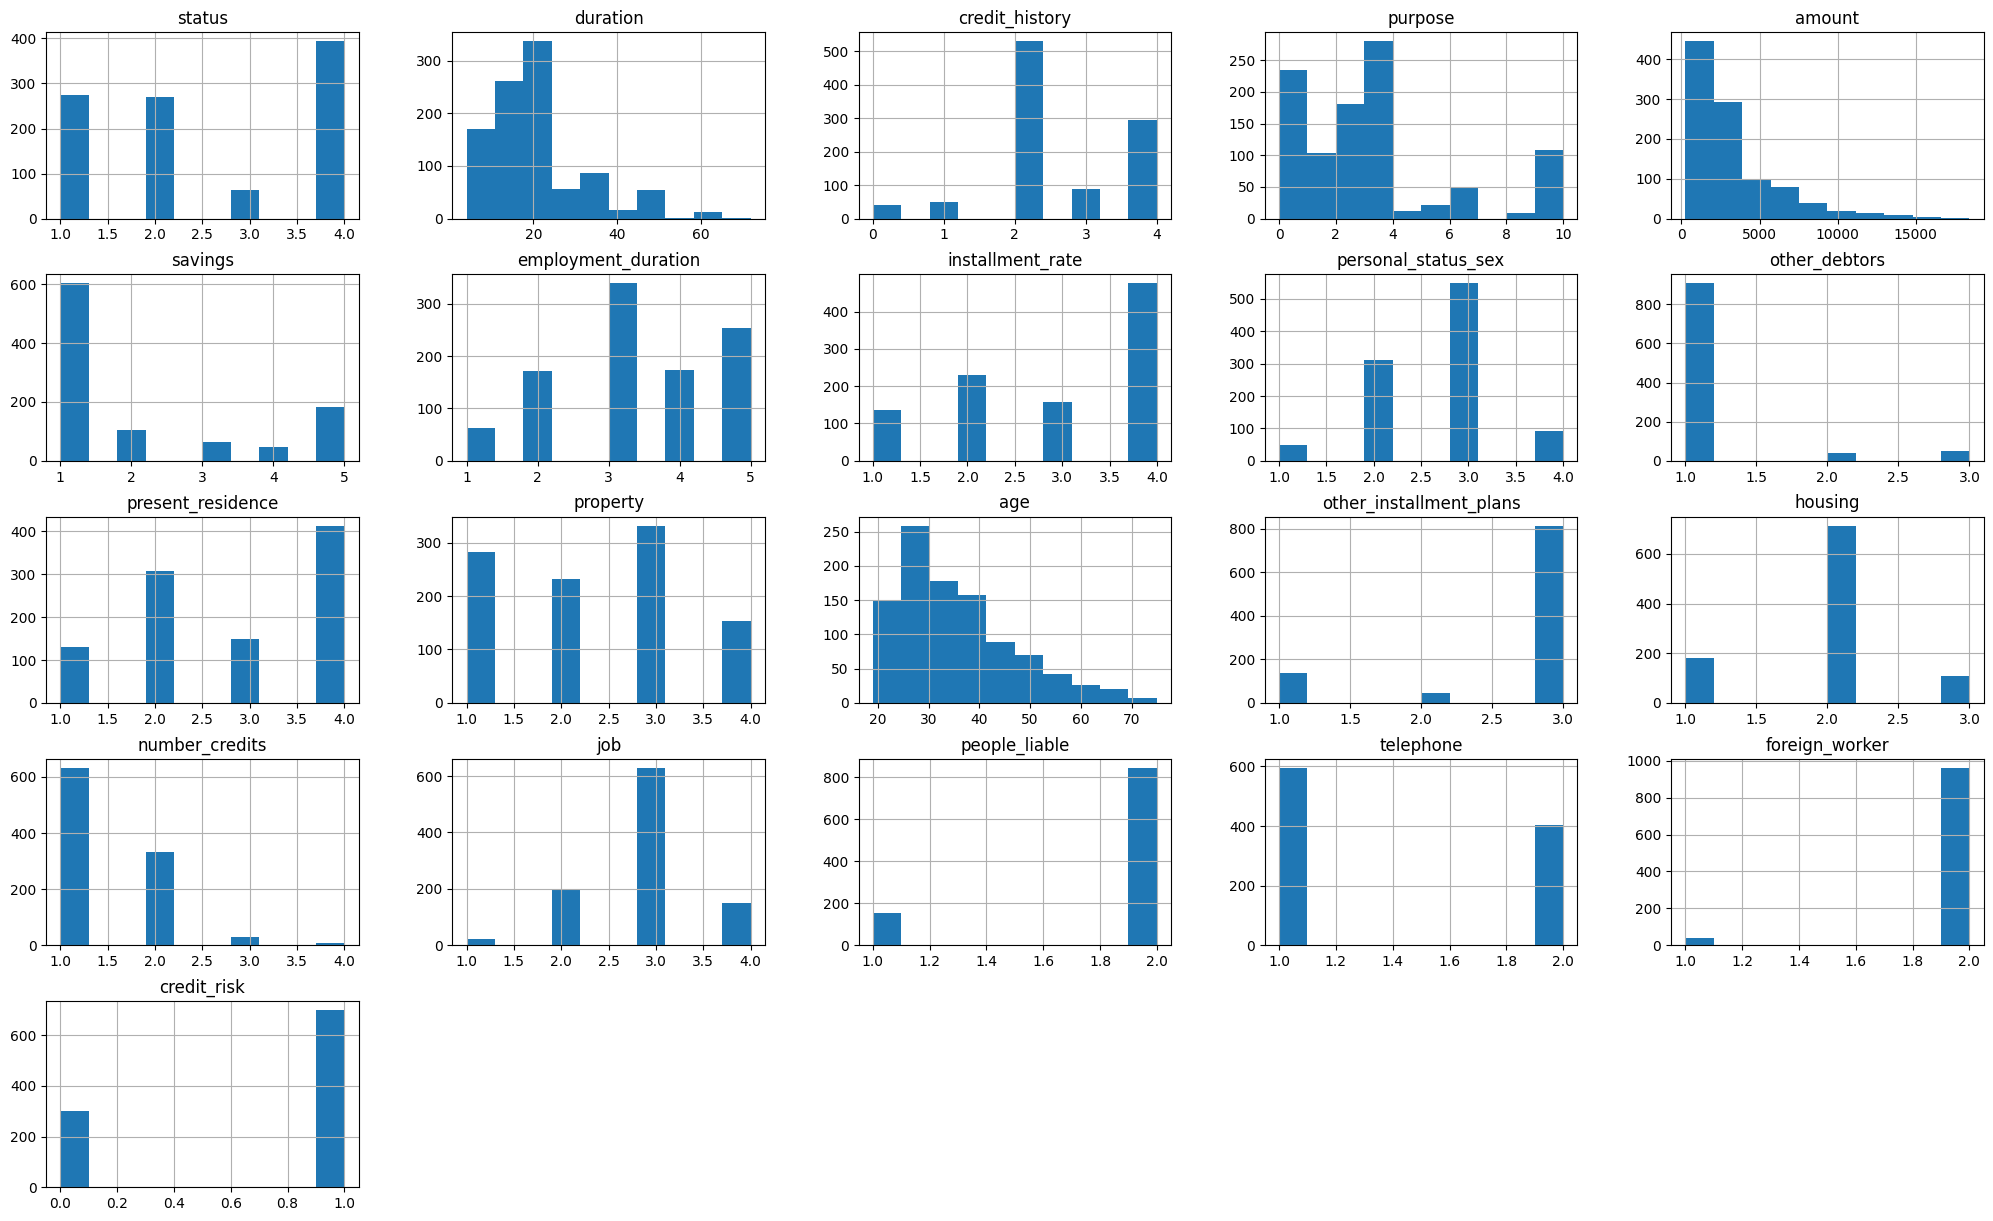

In [10]:
# plotando um histrograma das variaveis 

df.hist()

plt.gcf().set_size_inches(25,15)

In [11]:
# excluindo uma coluna
df.drop('personal_status_sex', axis =1 , inplace = True) 
df.drop('telephone', axis =1, inplace = True)

## Criando novas variaveis

In [12]:
# construção de variaveis

# desvio padrao['amount'] - 'amount'
df['amount_std'] = df['amount'].std() - df['amount']

# 'purpose-savings/'savings' - credito pedido - reserva  / reserva
df['relacao_purpose'] = round(((df['purpose'] - df['savings'])/df['savings']),5)

# 'amount'-'savings' / 'savings'- credito pedido - reserva $ / reserva
#df['relacao_amount'] = round(((df['amount'] - df['savings'])/df['savings']),5)

# 'purpose' / 'duration' - credito pedido / duração 
df['time_credit'] = round((df['purpose'] / df['duration']),10)

# 'employment_duration' + 'status' - status trabalhador
df['trabalho'] = df['employment_duration'] + df['status']

#   'amount' - 'purpose' -   credit disponivel- credito pedido
df['purpose_amount'] =  df['purpose'] - df['amount']


# 'status' + 'savings'
df['status_savings'] = df['status'] + df['savings']

In [13]:
# limpando os NaNs

df.dropna(axis=0)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,...,job,people_liable,foreign_worker,credit_risk,amount_std,relacao_purpose,time_credit,trabalho,purpose_amount,status_savings
0,1,18,4,2,1049,1,2,4,1,4,...,3,2,2,1,1773.75176,1.0,0.111111,3,-1047,2
1,1,9,4,0,2799,1,3,2,1,2,...,3,1,2,1,23.75176,-1.0,0.000000,4,-2799,2
2,2,12,2,9,841,2,4,2,1,4,...,2,2,2,1,1981.75176,3.5,0.750000,6,-832,4
3,1,12,4,0,2122,1,3,3,1,2,...,2,1,1,1,700.75176,-1.0,0.000000,4,-2122,2
4,1,12,4,0,2171,1,3,4,1,4,...,2,2,1,1,651.75176,-1.0,0.000000,4,-2171,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,1,4,...,2,1,2,0,835.75176,2.0,0.125000,4,-1984,2
996,1,24,2,0,2303,1,5,4,2,1,...,3,2,2,0,519.75176,-1.0,0.000000,6,-2303,2
997,4,21,4,0,12680,5,5,4,1,4,...,4,2,2,0,-9857.24824,-1.0,0.000000,9,-12680,9
998,2,12,2,3,6468,5,1,2,1,1,...,4,2,2,0,-3645.24824,-0.4,0.250000,3,-6465,7


## transformando variaveis constantes em intervalos

In [14]:
# separando a idade 'age' em intervalos 
age_int = list(range(df.age.min(), df.age.max()+10, 10)) # dividindo de 10 em 10

# criando o nome dos intervalos
nome_int = [f'age_i{i}' for i in range(len(age_int)-1)]

# atribuindo ao dataframe
df['age_int'] = pd.cut(df.age, age_int, labels = nome_int, include_lowest = True)

###########################################################################################
# separando a idade 'duration' em intervalos 
duration_int = list(range(df.duration.min(), df.duration.max()+12, 12)) # dividindo de 12 em 12

# criando o nome dos intervalos
nome_int2 = [f'duration_i{i}' for i in range(len(duration_int)-1)]

# atribuindo ao dataframe
df['duration_int'] = pd.cut(df.duration, duration_int, labels = nome_int2, include_lowest = True)

###########################################################################################
# separando a idade 'amount' em intervalos 
amount_int = list(range(df.amount.min(), df.amount.max()+3000, 3000)) # dividindo de 3k em 3k

# criando o nome dos intervalos
nome_int3 = [f'amount_i{i}' for i in range(len(amount_int)-1)]

# atribuindo ao dataframe
df['amount_int'] = pd.cut(df.amount, amount_int, labels = nome_int3, include_lowest = True)

In [15]:
# removendo a variavel 'age'
df = df.drop(['age', 'duration', 'amount'], axis = 1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   status                   1000 non-null   int64   
 1   credit_history           1000 non-null   int64   
 2   purpose                  1000 non-null   int64   
 3   savings                  1000 non-null   int64   
 4   employment_duration      1000 non-null   int64   
 5   installment_rate         1000 non-null   int64   
 6   other_debtors            1000 non-null   int64   
 7   present_residence        1000 non-null   int64   
 8   property                 1000 non-null   int64   
 9   other_installment_plans  1000 non-null   int64   
 10  housing                  1000 non-null   int64   
 11  number_credits           1000 non-null   int64   
 12  job                      1000 non-null   int64   
 13  people_liable            1000 non-null   int64   
 14  foreign_w

In [17]:
# convertendo dtype de category em numerico 
categorias = {'age_int': {'age_i0': 0, 'age_i1': 1, 'age_i2': 2, 'age_i4': 4, 'age_i3': 3, 'age_i5': 5}}
df.replace(categorias, inplace = True)

#################################################
# convertendo dtype de category para int
categorias2 = {'duration_int': {'duration_i0': 0, 'duration_i1': 1, 'duration_i2': 2, 'duration_i4': 4, 'duration_i3': 3, 'duration_i5': 5,'duration_i6': 6}}
df.replace(categorias2, inplace = True)

#################################################
# convertendo dtype de category para int
categorias3 = {'amount_int': {'amount_i0': 0, 'amount_i1': 1, 'amount_i2': 2, 'amount_i4': 4, 'amount_i3': 3, 'amount_i5': 5,'amount_i6': 6}}
df.replace(categorias3, inplace = True)

In [18]:
#transformando em int
df['age_int'] = np.array(df['age_int'],dtype='int')
df['duration_int'] = np.array(df['duration_int'],dtype='int')
df['amount_int'] = np.array(df['amount_int'],dtype='int')

In [19]:
df.columns

Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'other_debtors', 'present_residence', 'property',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'foreign_worker', 'credit_risk', 'amount_std',
       'relacao_purpose', 'time_credit', 'trabalho', 'purpose_amount',
       'status_savings', 'age_int', 'duration_int', 'amount_int'],
      dtype='object')

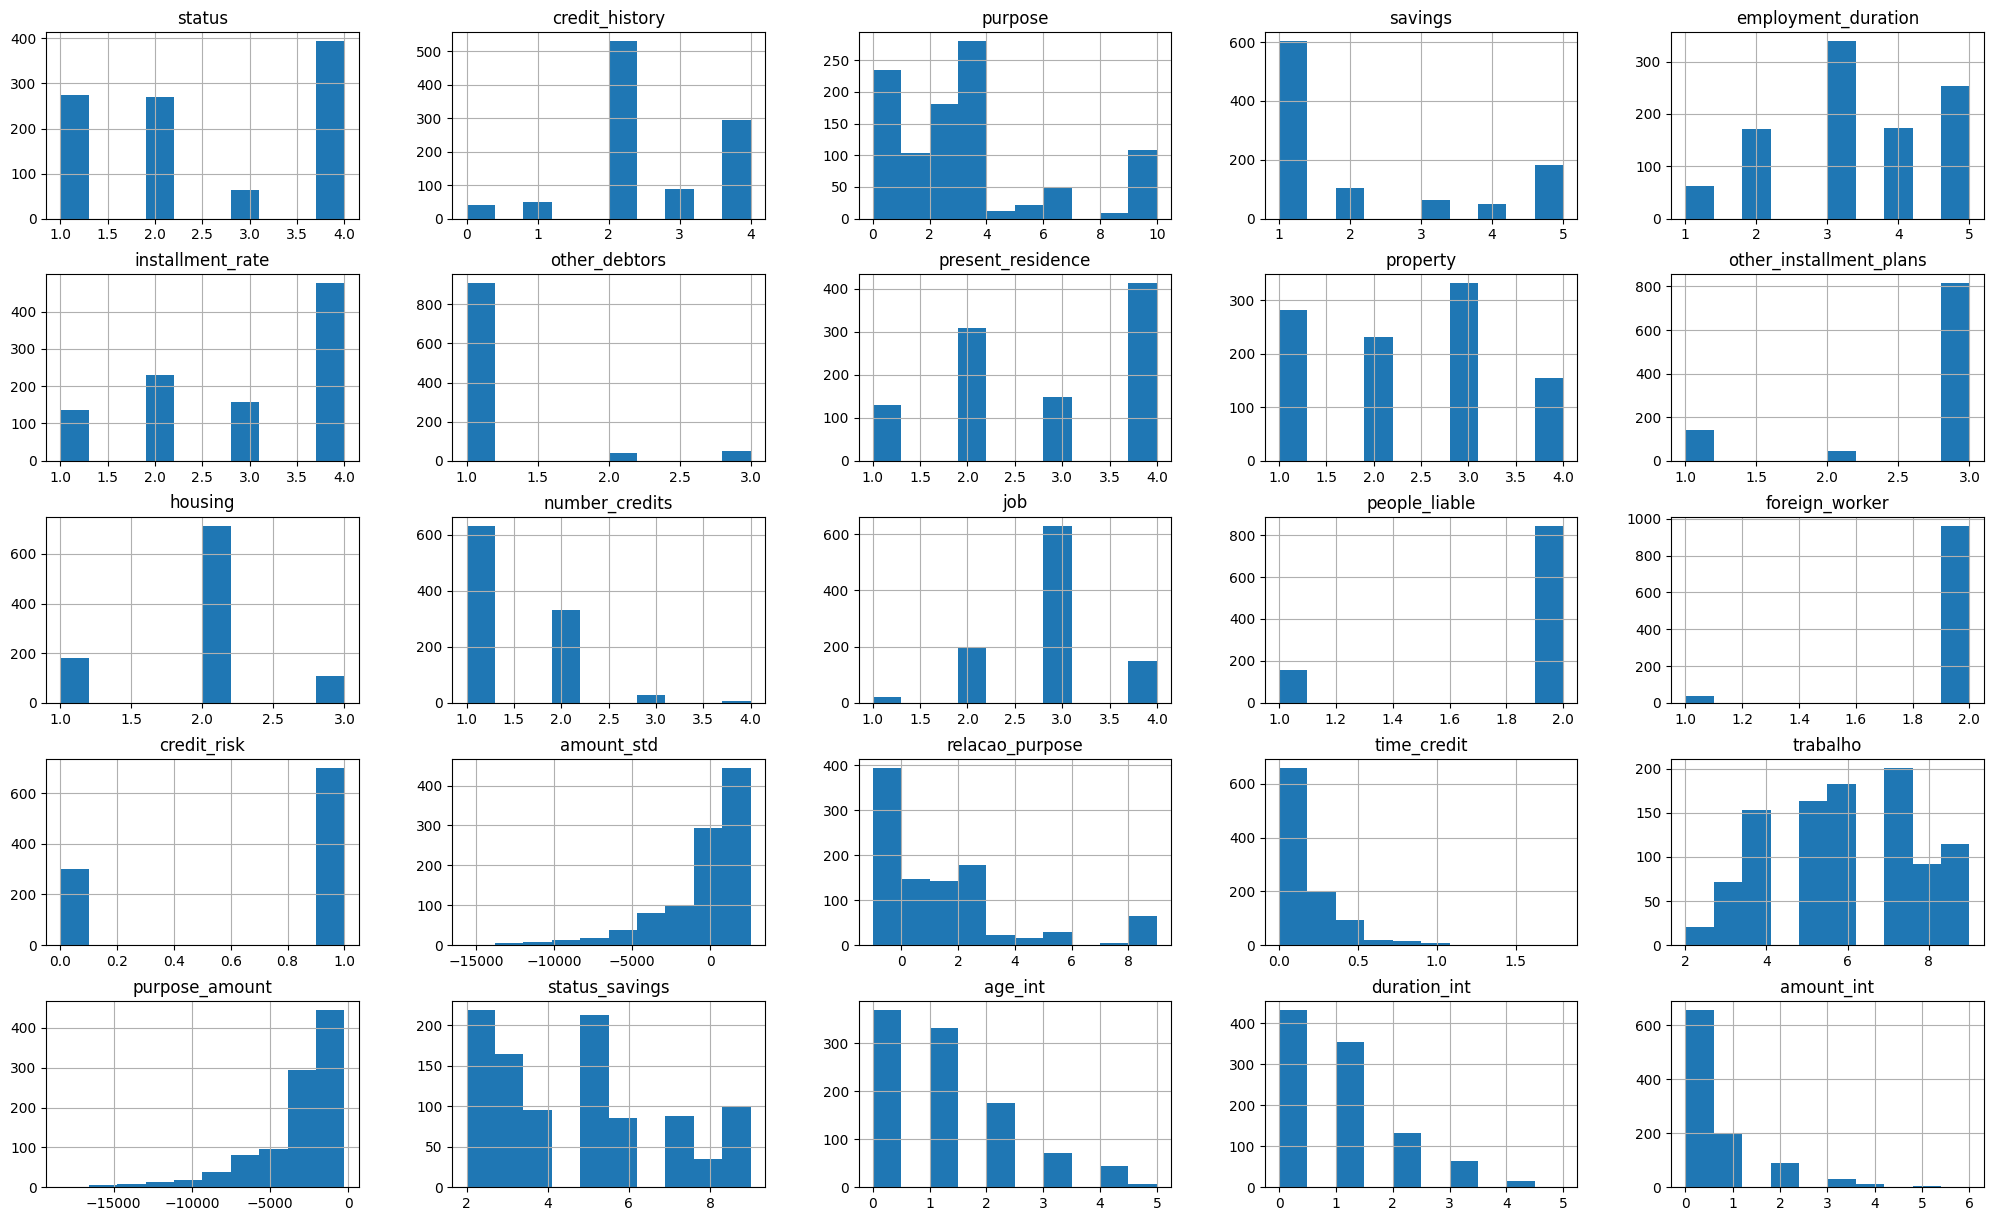

In [20]:
# plotando um histrograma das variaveis 

df.hist()

plt.gcf().set_size_inches(25,15)

# Randon Florest para escolha de variaveis

In [21]:
# sempando o dataset para treinamento e teste

x_rf = df.drop('credit_risk', axis = 1)
y_rf = df['credit_risk']

# para insto precisamo da função train_test_split do sklearn
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_rf, y_rf, test_size = 0.7)

In [22]:
df_rf = RandomForestClassifier(bootstrap = True, criterion='gini'
                              , max_depth= 15, max_features= 'auto'
                              , min_samples_leaf=1, min_samples_split= 5
                              , n_estimators= 1500, n_jobs= 5, oob_score= True)
df_rf.fit(x_train_rf, y_train_rf)

/home/marcos_well/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=15, max_features='auto', min_samples_split=5,
                       n_estimators=1500, n_jobs=5, oob_score=True)

In [23]:
# fazendo a predição da base de treinamento e teste

y_pred_train_rf = df_rf.predict(x_train_rf)
y_pred_test_rf = df_rf.predict(x_test_rf)

In [24]:
# Calculando a ROC e o Gini - Treinamento
fpr_train_rf, tpr_train_rf, thresholds_train_rf = roc_curve(y_train_rf, y_pred_train_rf)
roc_auc_train_rf = auc(fpr_train_rf, tpr_train_rf)

print('AUC -  Treinamento : %f' % roc_auc_train_rf)
print('Gini -  Treinamento : ', round(2*roc_auc_train_rf-1,2))
print()

# Calculando a ROC e o Gini - Teste
fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test_rf, y_pred_test_rf)
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

print('AUC -  Test : %f' % roc_auc_test_rf)
print('Gini -  Test : ', round(2*roc_auc_test_rf-1,2))
print()

AUC -  Treinamento : 0.965517
Gini -  Treinamento :  0.93

AUC -  Test : 0.643646
Gini -  Test :  0.29



In [25]:
# Analisando a importancia das variaveis

imp_rf = pd.DataFrame({'Variaveis': x_train_rf.columns, 'Importancia': df_rf.feature_importances_})# feature_importances_ - mostra as variaveis importantes
imp_rf = imp_rf.sort_values(by=['Importancia'],ascending= False)

#soma acumulativa da 'Importancia'
imp_rf['cumsum'] = imp_rf['Importancia'].cumsum()

imp_rf

,Variaveis,Importancia,cumsum
0,status,0.090109,0.090109
19,purpose_amount,0.081891,0.172000
15,amount_std,0.077857,0.249857
18,trabalho,0.077831,0.327689
20,status_savings,0.070459,0.398147
17,time_credit,0.061418,0.459565
21,age_int,0.054772,0.514337
16,relacao_purpose,0.053541,0.567878
1,credit_history,0.049951,0.617829
5,installment_rate,0.047707,0.665536


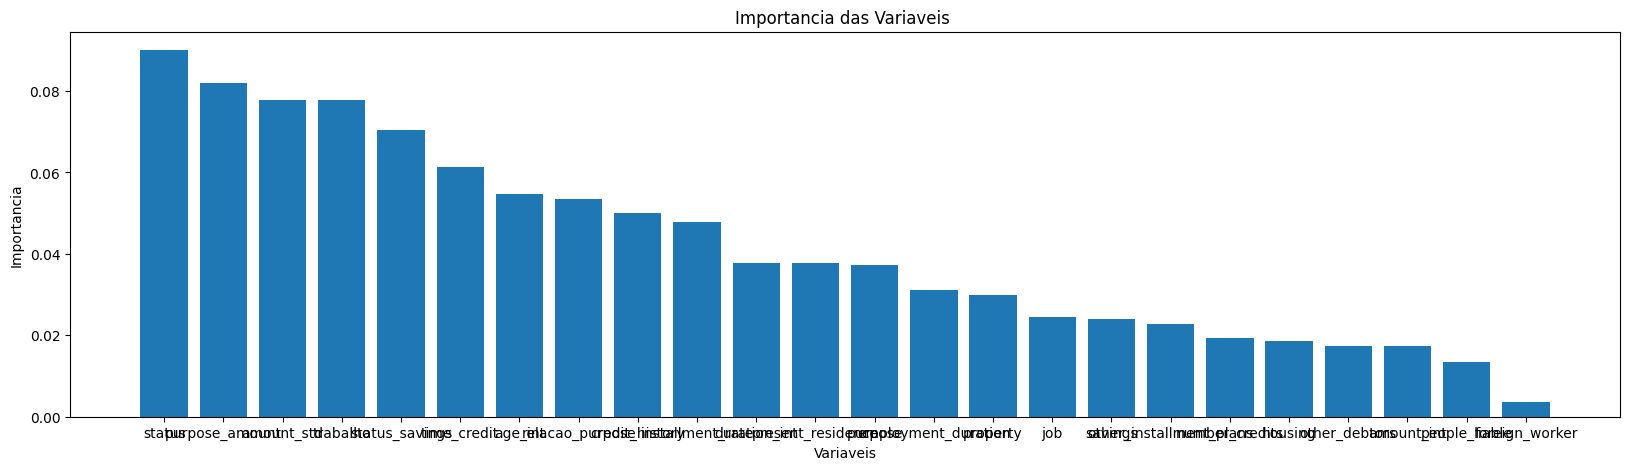

In [26]:
plt.figure(figsize=(20,5))
plt.xticks(range(len(imp_rf)), imp_rf['Variaveis'])
plt.xlabel('Variaveis')
plt.ylabel('Importancia')
plt.title('Importancia das Variaveis ')
plt.bar(range(len(imp_rf)), imp_rf['Importancia']);

In [27]:
imp_rf[0:20]

,Variaveis,Importancia,cumsum
0,status,0.090109,0.090109
19,purpose_amount,0.081891,0.172000
15,amount_std,0.077857,0.249857
18,trabalho,0.077831,0.327689
20,status_savings,0.070459,0.398147
17,time_credit,0.061418,0.459565
21,age_int,0.054772,0.514337
16,relacao_purpose,0.053541,0.567878
1,credit_history,0.049951,0.617829
5,installment_rate,0.047707,0.665536


In [28]:
imp_rf['Variaveis'].values

array(['status', 'purpose_amount', 'amount_std', 'trabalho',
       'status_savings', 'time_credit', 'age_int', 'relacao_purpose',
       'credit_history', 'installment_rate', 'duration_int',
       'present_residence', 'purpose', 'employment_duration', 'property',
       'job', 'savings', 'other_installment_plans', 'number_credits',
       'housing', 'other_debtors', 'amount_int', 'people_liable',
       'foreign_worker'], dtype=object)

In [46]:
# variaveis que serão usadas no modelo - entorno de 75% da importancia

df2 = df[['status', 'purpose_amount', 'amount_std', 'trabalho',
       'status_savings', 'time_credit', 'age_int', 'relacao_purpose',
       'credit_history', 'installment_rate', 'duration_int',
       'present_residence','purpose', 'employment_duration', 'property',
       'job', 'savings','credit_risk']]


# Regressão Logistica

## Seprando os dados para teste e treinamento

In [86]:
# separando os dados com as variavesi em x e o alvo y 

x = df2.drop('credit_risk', axis = 1)
y = df2['credit_risk']

# separando entre treinamento e teste 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [87]:
# Inicializa a intancia e treina o modelo 

x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)


reg_log = sm.GLM(y_train, x_train_, family = sm.families.Binomial())

reg_log = reg_log.fit()

print(reg_log.summary())
print()
print('Parameters: ', reg_log.params)
print()
print('Odds ratio')
print(np.exp(reg_log.params)) # valores para aplicar na formula da Regressão Logística

                 Generalized Linear Model Regression Results                  
Dep. Variable:            credit_risk   No. Observations:                  500
Model:                            GLM   Df Residuals:                      485
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -252.18
Date:                Mon, 19 Jun 2023   Deviance:                       504.35
Time:                        21:36:00   Pearson chi2:                     509.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2076
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.223e-05   3

## Avaliação do Modelo

In [88]:
# fazendo a predisão  na base de treinamento e na de teste

y_pred_train = reg_log.predict(x_train_)

y_pred_test = reg_log.predict(x_test_)

# Calculando a ROC e o Gini - Treinamento
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

print('AUC -  Treinamento : %f' % roc_auc_train)
print('Gini -  Treinamento : ', round(2*roc_auc_train-1,2))
print()


# Calculando a ROC e o Gini - Teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)

print('AUC -  Test : %f' % roc_auc_test)
print('Gini -  Test : ', round(2*roc_auc_test-1,2))
print()

AUC -  Treinamento : 0.784809
Gini -  Treinamento :  0.57

AUC -  Test : 0.785268
Gini -  Test :  0.57

